# Jetrail Time Series Forecasting

 In order to help Unicorn Ventures in their decision, we need to forecast the traffic on JetRail for the next 7 months. You are provided with traffic data of JetRail since 25th August 2012 to 25th September 2014
 and we need to predict traffic from 26 september 2014 to 26 April 2015 i.e. 7 months
 
 I will be testing models like Moving averages , ARIMA model and  Facebook's Prophet model and will be dividing the training data into train and validation set . The train set consists of data from 2012-august to 2014- june  and validation set consists of data from 2014-june to 2014-september. 
 The model that gave the lowest (Prophet gives the lowest , as we will see) RMSE score , will be used for doing prediction on test dataset.
 
 The final RMSE score on test dataset after submission on Analytics Vidhya is 231.06.

<b>Importing Packages</b>

In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


<b>Reading files</b>

In [244]:
df_train=pd.read_csv('train_timeseries.csv')
df_train.Timestamp = pd.to_datetime(df_train.Datetime,format='%d-%m-%Y %H:%M') 
df_train.index = df_train.Timestamp 


<ipython-input-244-ff6690fbd5d7>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_train.Timestamp = pd.to_datetime(df_train.Datetime,format='%d-%m-%Y %H:%M')


In [245]:
df_train['2012-08-25':'2012-09-02']

,ID,Datetime,Count
Datetime,,,
2012-08-25 00:00:00,0,25-08-2012 00:00,8
2012-08-25 01:00:00,1,25-08-2012 01:00,2
2012-08-25 02:00:00,2,25-08-2012 02:00,6
2012-08-25 03:00:00,3,25-08-2012 03:00,2
2012-08-25 04:00:00,4,25-08-2012 04:00,2
...,...,...,...
2012-09-02 19:00:00,211,02-09-2012 19:00,8
2012-09-02 20:00:00,212,02-09-2012 20:00,4
2012-09-02 21:00:00,213,02-09-2012 21:00,8


In [246]:
df_train

,ID,Datetime,Count
Datetime,,,
2012-08-25 00:00:00,0,25-08-2012 00:00,8
2012-08-25 01:00:00,1,25-08-2012 01:00,2
2012-08-25 02:00:00,2,25-08-2012 02:00,6
2012-08-25 03:00:00,3,25-08-2012 03:00,2
2012-08-25 04:00:00,4,25-08-2012 04:00,2
...,...,...,...
2014-09-25 19:00:00,18283,25-09-2014 19:00,868
2014-09-25 20:00:00,18284,25-09-2014 20:00,732
2014-09-25 21:00:00,18285,25-09-2014 21:00,702


In [247]:
# df_train=df_train.set_index('Datetime')


In [248]:
df_train

,ID,Datetime,Count
Datetime,,,
2012-08-25 00:00:00,0,25-08-2012 00:00,8
2012-08-25 01:00:00,1,25-08-2012 01:00,2
2012-08-25 02:00:00,2,25-08-2012 02:00,6
2012-08-25 03:00:00,3,25-08-2012 03:00,2
2012-08-25 04:00:00,4,25-08-2012 04:00,2
...,...,...,...
2014-09-25 19:00:00,18283,25-09-2014 19:00,868
2014-09-25 20:00:00,18284,25-09-2014 20:00,732
2014-09-25 21:00:00,18285,25-09-2014 21:00,702


In [249]:
type(df_train.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [250]:
df_test=pd.read_csv('test_timeseries.csv')
a=df_test['ID']
df_test.Timestamp = pd.to_datetime(df_test.Datetime,format='%d-%m-%Y %H:%M') 
df_test.index = df_test.Timestamp 


<ipython-input-250-82abcb11ce9c>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_test.Timestamp = pd.to_datetime(df_test.Datetime,format='%d-%m-%Y %H:%M')


In [251]:
df_test

,ID,Datetime
Datetime,,
2014-09-26 00:00:00,18288,26-09-2014 00:00
2014-09-26 01:00:00,18289,26-09-2014 01:00
2014-09-26 02:00:00,18290,26-09-2014 02:00
2014-09-26 03:00:00,18291,26-09-2014 03:00
2014-09-26 04:00:00,18292,26-09-2014 04:00
...,...,...
2015-04-26 19:00:00,23395,26-04-2015 19:00
2015-04-26 20:00:00,23396,26-04-2015 20:00
2015-04-26 21:00:00,23397,26-04-2015 21:00


In [252]:
del df_test['ID']
del df_test['Datetime']
df_test=df_test.reset_index()


In [253]:
a

0       18288
1       18289
2       18290
3       18291
4       18292
        ...  
5107    23395
5108    23396
5109    23397
5110    23398
5111    23399
Name: ID, Length: 5112, dtype: int64

In [254]:
df_test

,Datetime
0,2014-09-26 00:00:00
1,2014-09-26 01:00:00
2,2014-09-26 02:00:00
3,2014-09-26 03:00:00
4,2014-09-26 04:00:00
...,...
5107,2015-04-26 19:00:00
5108,2015-04-26 20:00:00
5109,2015-04-26 21:00:00
5110,2015-04-26 22:00:00


In [255]:
df_train

,ID,Datetime,Count
Datetime,,,
2012-08-25 00:00:00,0,25-08-2012 00:00,8
2012-08-25 01:00:00,1,25-08-2012 01:00,2
2012-08-25 02:00:00,2,25-08-2012 02:00,6
2012-08-25 03:00:00,3,25-08-2012 03:00,2
2012-08-25 04:00:00,4,25-08-2012 04:00,2
...,...,...,...
2014-09-25 19:00:00,18283,25-09-2014 19:00,868
2014-09-25 20:00:00,18284,25-09-2014 20:00,732
2014-09-25 21:00:00,18285,25-09-2014 21:00,702


<b>Check for null values in the dataframe</b>


In [256]:
bool_series=pd.isnull(df_train.index)
df_train[bool_series]

#hence there is no null column

,ID,Datetime,Count
Datetime,,,


In [257]:
bool_series=pd.isnull(df_test.index)
df_test[bool_series]


,Datetime


In [258]:
del df_train['ID']

In [259]:
del df_train['Datetime']

In [260]:
df_train

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2
...,...
2014-09-25 19:00:00,868
2014-09-25 20:00:00,732
2014-09-25 21:00:00,702


<b>plotting the training data</b>

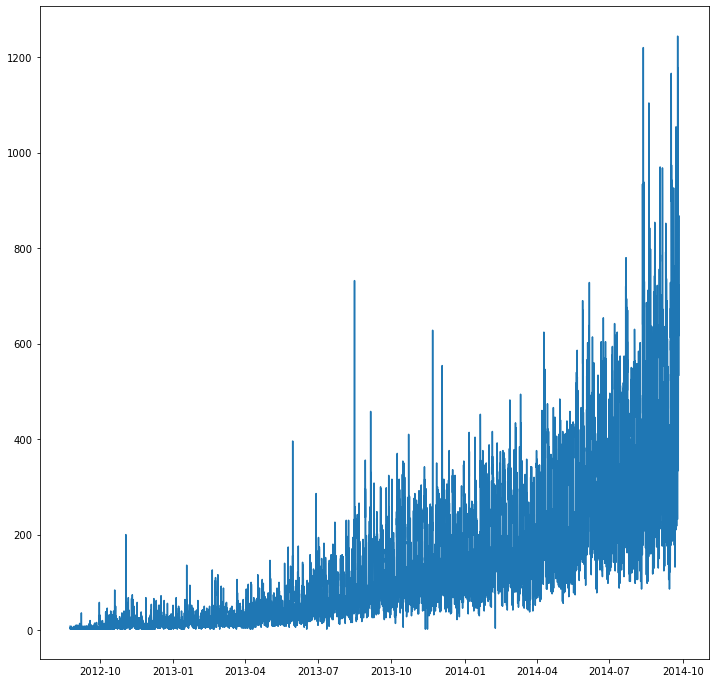

In [261]:
plt.figure(figsize=(12,12))
plt.plot(df_train)

<b>checking for stationarity of the dataset</b>

In [262]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=24).mean()
    rolstd = timeseries.rolling(window=24).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

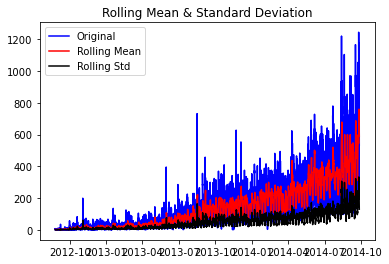

Results of Dickey-Fuller Test:
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [263]:
test_stationarity(df_train) 
#since test statistic is even less than 1% critical value, and also p-value<0.05 
#so we conclude that the timeseries is stationary

In [264]:
# df_train=df_train.sort_index(ascending=True,axis=0)
df_train

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2
...,...
2014-09-25 19:00:00,868
2014-09-25 20:00:00,732
2014-09-25 21:00:00,702


In [265]:
# df_train['2012-01-09':'2014-01-09']
df_train

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2
...,...
2014-09-25 19:00:00,868
2014-09-25 20:00:00,732
2014-09-25 21:00:00,702


<b>Moving Averages</b>

In [214]:
#we split train data to 2012-august to 2014- june
# and validation into 2014-june to 2014-september
train = df_train[:16080]  #16080 rows
valid = df_train[16080:]   #2208 rows
valid

,Count
Datetime,
2014-06-26 00:00:00,338
2014-06-26 01:00:00,232
2014-06-26 02:00:00,330
2014-06-26 03:00:00,604
2014-06-26 04:00:00,350
...,...
2014-09-25 19:00:00,868
2014-09-25 20:00:00,732
2014-09-25 21:00:00,702


In [215]:
preds = []
for i in range(0,valid.shape[0]):
    a = train['Count'][len(train)-2208+i:].sum() + sum(preds)
    b = a/2208
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Count'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
211.73016339157303


<ipython-input-216-6ffa1c285fd6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = 0
<ipython-input-216-6ffa1c285fd6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = preds


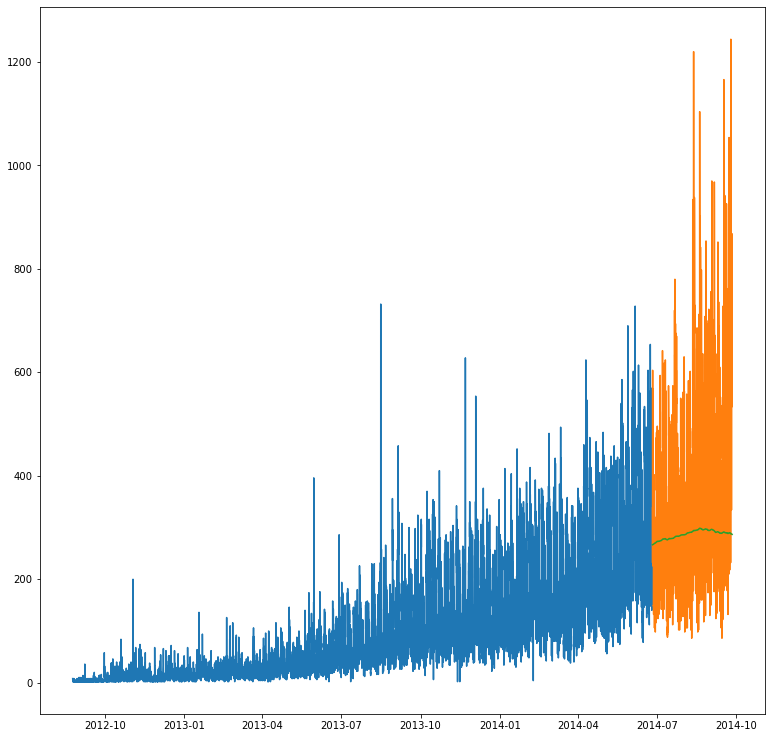

In [216]:
#plot
plt.figure(figsize=(13,13))
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Count'])
plt.plot(valid[['Count', 'Predictions']])


<b>Auto Arima</b>

In [217]:
#for validating


from pmdarima.arima import auto_arima



train = df_train[:16080]
valid = df_train[16080:]

training = train['Count']
validation = valid['Count']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=1,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=2208)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=156366.652, Time=6.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=156468.612, Time=0.58 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=156394.013, Time=0.69 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=156402.140, Time=1.71 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=156466.620, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=156339.305, Time=8.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=156345.897, Time=1.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=156339.117, Time=18.37 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=156338.793, Time=1.49 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=156336.801, Time=0.59 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=156343.905, Time=0.48 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=156337.125, Time=7.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=156337.312, Time=2.99 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0]          
Total fit time: 49.526 se

In [218]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Count'])-np.array(forecast['Prediction'])),2)))
rms

189.8444256678094

In [219]:
forecast

,Prediction
Datetime,
2014-06-26 00:00:00,359.579032
2014-06-26 01:00:00,357.751093
2014-06-26 02:00:00,356.982838
2014-06-26 03:00:00,357.014249
2014-06-26 04:00:00,356.924605
...,...
2014-09-25 19:00:00,356.907295
2014-09-25 20:00:00,356.907295
2014-09-25 21:00:00,356.907295


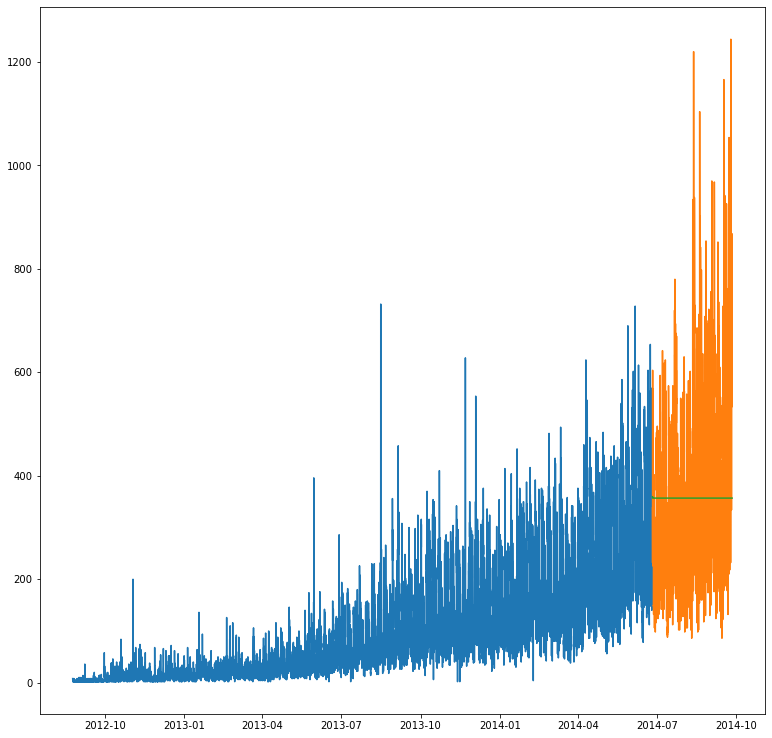

In [220]:
#plot
plt.figure(figsize=(13,13))
plt.plot(train['Count'])
plt.plot(valid['Count'])
plt.plot(forecast['Prediction'])

<b>Prophet</b>

In [221]:
# #for validating

from fbprophet import Prophet
df=df_train
# df=df.sort_index(ascending=True)
df=df.reset_index()
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Datetime', 'Count'])

for i in range(0,len(df)):
    new_data['Datetime'][i] = df['Datetime'][i]
    new_data['Count'][i] = df['Count'][i]
new_data.index = new_data['Datetime']


#preparing data
new_data.rename(columns={'Count': 'y', 'Datetime': 'ds'}, inplace=True)
train = new_data[:16080]
valid = new_data[16080:]
model = Prophet()
model.fit(train)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [222]:
# for validating

b=valid
b=b.reset_index()
del b['Datetime']
del b['y']
forecast = model.predict(b)
#rmse
forecast_valid = forecast['yhat']
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms

153.04195617459823

<ipython-input-223-0102cca35a87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = 0
<ipython-input-223-0102cca35a87>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = forecast_valid.values


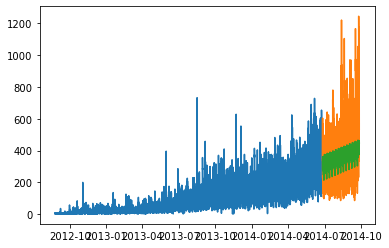

In [223]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values

plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])

<b> As we see that prophet gives the lowest RMSE score of 153.04 and hence it will be used for predictions on test data</b>

In [266]:
from fbprophet import Prophet
df=df_train
# df=df.sort_index(ascending=True)
df=df.reset_index()
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Datetime', 'Count'])

for i in range(0,len(df)):
    new_data['Datetime'][i] = df['Datetime'][i]
    new_data['Count'][i] = df['Count'][i]
new_data.index = new_data['Datetime']


#preparing data
new_data.rename(columns={'Count': 'y', 'Datetime': 'ds'}, inplace=True)
train = new_data

model = Prophet()
model.fit(train)

In [267]:
#test predictions

close_prices_test=df_test

close_prices_test.rename(columns={'Datetime':'ds'},inplace=True)
# # # close_prices
forecast_test = model.predict(close_prices_test)

# forecast_test


In [268]:
forecast_test

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-09-26 00:00:00,483.703072,423.198498,598.687055,483.703072,483.703072,25.713945,25.713945,25.713945,5.315814,...,10.748455,10.748455,10.748455,9.649676,9.649676,9.649676,0.0,0.0,0.0,509.417017
1,2014-09-26 01:00:00,483.769061,396.632944,570.963130,483.769061,483.769061,3.154371,3.154371,3.154371,-17.129964,...,10.591097,10.591097,10.591097,9.693238,9.693238,9.693238,0.0,0.0,0.0,486.923432
2,2014-09-26 02:00:00,483.835049,372.302574,549.066399,483.835049,483.835049,-19.539418,-19.539418,-19.539418,-39.722458,...,10.446515,10.446515,10.446515,9.736525,9.736525,9.736525,0.0,0.0,0.0,464.295631
3,2014-09-26 03:00:00,483.901037,353.151372,536.538862,483.901037,483.901037,-37.163942,-37.163942,-37.163942,-57.251026,...,10.307549,10.307549,10.307549,9.779535,9.779535,9.779535,0.0,0.0,0.0,446.737095
4,2014-09-26 04:00:00,483.967025,350.657436,519.938148,483.967025,483.967025,-48.365032,-48.365032,-48.365032,-68.353620,...,10.166319,10.166319,10.166319,9.822269,9.822269,9.822269,0.0,0.0,0.0,435.601994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5107,2015-04-26 19:00:00,820.704977,704.126405,936.942954,748.453608,885.720028,1.865559,1.865559,1.865559,38.781984,...,-35.966341,-35.966341,-35.966341,-0.950084,-0.950084,-0.950084,0.0,0.0,0.0,822.570535
5108,2015-04-26 20:00:00,820.770965,706.432568,927.418004,748.517185,885.805590,1.758120,1.758120,1.758120,35.532906,...,-32.729946,-32.729946,-32.729946,-1.044841,-1.044841,-1.044841,0.0,0.0,0.0,822.529084
5109,2015-04-26 21:00:00,820.836953,706.431324,933.727060,748.580763,885.891152,2.504943,2.504943,2.504943,33.056321,...,-29.411657,-29.411657,-29.411657,-1.139720,-1.139720,-1.139720,0.0,0.0,0.0,823.341896
5110,2015-04-26 22:00:00,820.902941,706.809396,933.086490,748.644340,885.976713,2.688089,2.688089,2.688089,29.955081,...,-26.032273,-26.032273,-26.032273,-1.234719,-1.234719,-1.234719,0.0,0.0,0.0,823.591031


In [269]:
forecast_final=forecast_test['yhat']

In [270]:
final_ans=pd.DataFrame(forecast_final)
final_ans['ID']=a


In [271]:
final_ans=final_ans.set_index('ID')

In [272]:
final_ans.rename(columns={'yhat':'Count'},inplace=True)
final_ans



,Count
ID,
18288,509.417017
18289,486.923432
18290,464.295631
18291,446.737095
18292,435.601994
...,...
23395,822.570535
23396,822.529084
23397,823.341896


<b>Submitting the csv file</b>

In [273]:
final_ans.to_csv('timeseries_pred.csv')

<b> This model finally gave a RMSE score  of 231.06 on Analytics vidhya</b>